# Compare different effective model potentials

In [1]:
import matplotlib.pyplot as plt

from ryd_numerov.rydberg import RydbergState

## Check Rubidium with large n
For Rubidium and large quantum numbers n we expect the effective model potentials to be very similar.

In [2]:
state = RydbergState("Rb", n=40, l=0, j=0.5)

states: dict[str, RydbergState] = {}


states["model_potential_marinescu_1993"] = RydbergState(state.species, n=state.n, l=state.l, j=state.j)
states["model_potential_marinescu_1993"].create_model(potential_type="model_potential_marinescu_1993")

states["model_potential_fei_2009"] = RydbergState(state.species, n=state.n, l=state.l, j=state.j)
states["model_potential_fei_2009"].create_model(potential_type="model_potential_fei_2009")

for label, state in states.items():
    print(f"Creating wavefunction for {label}")
    state.create_wavefunction()

Creating wavefunction for model_potential_marinescu_1993
Creating wavefunction for model_potential_fei_2009


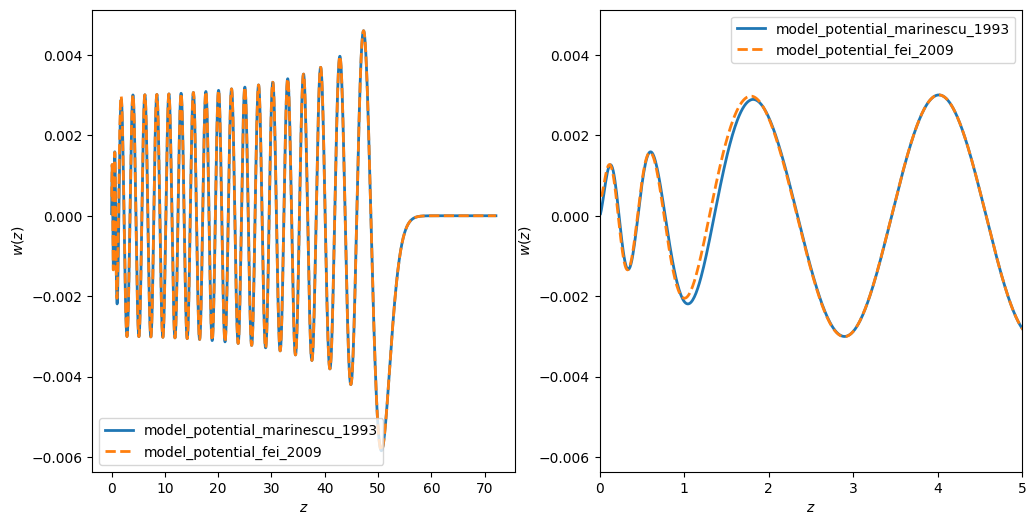

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax in axs:
    linestyles = ["-", "--", "-.", ":"]
    for label, state in states.items():
        ax.plot(state.grid.z_list, state.wavefunction.w_list, label=label, lw=2, ls=linestyles.pop(0))

    ax.legend()
    ax.set_xlabel("$z$")
    ax.set_ylabel("$w(z)$")

axs[1].set_xlim(0, 5)

plt.show()

## Big differences for Strontium with small n

In [4]:
state = RydbergState("Sr88_singlet", n=8, l=0, j=0)

states: dict[str, RydbergState] = {}


states["model_potential_marinescu_1993"] = RydbergState(state.species, n=state.n, l=state.l, j=state.j)
states["model_potential_marinescu_1993"].create_model(potential_type="model_potential_marinescu_1993")

states["model_potential_fei_2009"] = RydbergState(state.species, n=state.n, l=state.l, j=state.j)
states["model_potential_fei_2009"].create_model(potential_type="model_potential_fei_2009")

for label, state in states.items():
    print(f"Creating wavefunction for {label}")
    state.create_wavefunction()

The wavefunction (species=Sr88_singlet n=8, l=0, j=0.0) has some issues:
      The maximum of the wavefunction is close to the inner boundary (idmax=92) probably due to inner divergence of the wavefunction. 
      The wavefunction is negative at the inner boundary (-0.1835397054273211).
      The wavefunction has 6.0 nodes, but should have 7 nodes.


Creating wavefunction for model_potential_marinescu_1993
Creating wavefunction for model_potential_fei_2009


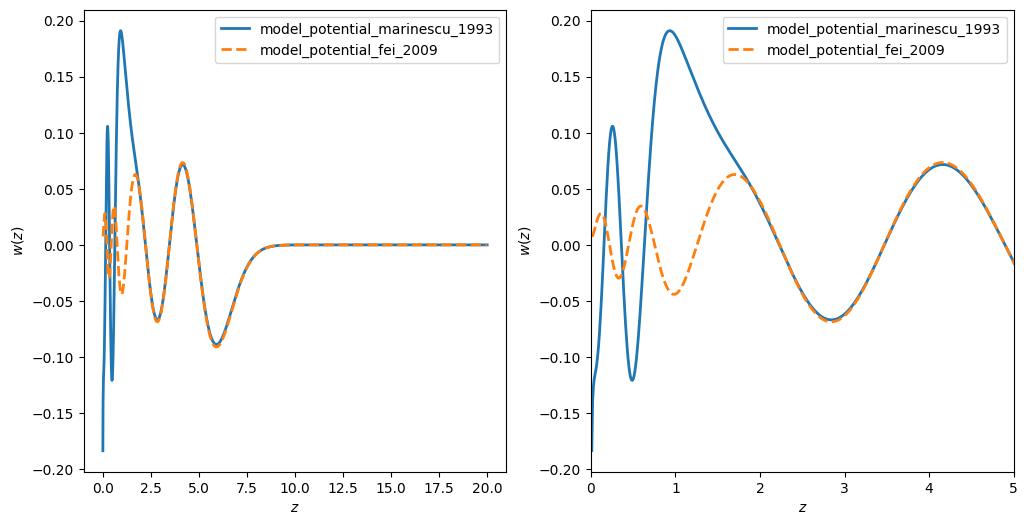

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax in axs:
    linestyles = ["-", "--", "-.", ":"]
    for label, state in states.items():
        ax.plot(state.grid.z_list, state.wavefunction.w_list, label=label, lw=2, ls=linestyles.pop(0))

    ax.legend()
    ax.set_xlabel("$z$")
    ax.set_ylabel("$w(z)$")

axs[1].set_xlim(0, 5)

plt.show()